In [1]:
your_local_path = "C:/Users/sylve/Downloads/Machine learning/Dataset/Project datasets modified/Customer Segmentation & Recommendation/Customer Segmentation _ Recommendation/"

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgridgrid")
%matplotlib inline


In [3]:
df1= pd.read_csv(your_local_path+"Supermarket Purchase.csv")


In [4]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Cust_id                         702 non-null int64
AVG_Actual_price_12             702 non-null float64
Purchase_Value                  702 non-null float64
No_of_Items                     702 non-null int64
Total_Discount                  702 non-null float64
MONTH_SINCE_LAST_TRANSACTION    702 non-null int64
dtypes: float64(3), int64(3)
memory usage: 33.0 KB


In [5]:
df1.describe()


,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,501.414530,2642.877917,19820.633305,10.720798,20806.339088,5.029915
std,295.756706,1879.138285,34639.752609,20.038311,58427.798572,3.562840
min,1.000000,22.500000,45.000000,1.000000,-3962.480000,1.000000
25%,245.750000,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,486.500000,2100.000000,8660.000000,4.000000,2599.250000,4.000000
75%,763.750000,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,1006.000000,10000.000000,302721.740000,172.000000,734349.820000,12.000000


In [6]:
print("total values")
print(df1["Cust_id"].count())
print("\n Max Values for all the attribute")
print(df1.loc[df1["No_of_Items"]].max())
print("\n Row of max values for column no_of_items")
print(df1.loc[df1["No_of_Items"].idxmax()])


total values
702

 Max Values for all the attribute
Cust_id                            239.000000
AVG_Actual_price_12               6903.933333
Purchase_Value                  206681.900000
No_of_Items                        172.000000
Total_Discount                  524174.000000
MONTH_SINCE_LAST_TRANSACTION        12.000000
dtype: float64

 Row of max values for column no_of_items
Cust_id                             26.000000
AVG_Actual_price_12               1276.385086
Purchase_Value                  206681.900000
No_of_Items                        172.000000
Total_Discount                  291783.100000
MONTH_SINCE_LAST_TRANSACTION         1.000000
Name: 16, dtype: float64


In [7]:
df1.head(10)


,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6
5,10,743.750000,8925.00,12,24075.00,7
6,11,1649.357143,14772.00,19,20748.00,1
7,12,2257.916667,37265.00,17,15330.00,3
8,13,472.500000,1890.00,4,6510.00,1
9,14,2800.000000,8400.00,3,1500.00,9


In [8]:
df1_train,df1_test = train_test_split(df1,test_size=0.33, random_state=42)

In [9]:
print(df1_train.head())
print(df1_test.head())
print("****** Train set *******")
print(df1_train.describe())
print("\n")
print("****** Test set *******")
print(df1_test.describe())

     Cust_id  AVG_Actual_price_12  Purchase_Value  No_of_Items  \
533      779          1620.454545         17825.0           11   
686      986           650.000000           650.0            1   
480      683          7055.000000          7055.0            1   
394      552          1787.500000         14300.0            8   
318      438          2324.000000         23240.0           10   

     Total_Discount  MONTH_SINCE_LAST_TRANSACTION  
533         64575.0                             1  
686             0.0                            11  
480          1245.0                             6  
394         42900.0                             3  
318         33410.0                            10  
     Cust_id  AVG_Actual_price_12  Purchase_Value  No_of_Items  \
493      706            1500.0000          6000.0            4   
164      228            8300.0000          8300.0            1   
54        73            1901.5625         60850.0           32   
641      932            131

In [10]:
from sklearn.preprocessing import MinMaxScaler
scld = MinMaxScaler(feature_range=(0,1))

arr_scld = scld.fit_transform(df1_train)
df1_train_scld = pd.DataFrame(arr_scld, columns = df1_train.columns)


arr_scld_comp = scld.fit_transform(df1)
df1_train_scld1 = pd.DataFrame(arr_scld_comp, columns = df1.columns)


D:\install\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\install\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
print("======Train set scaled======")
print(df1_train_scld.head())
print("======whole set scaled======")
print(df1_train_scld1.head())


======Train set scaled======
    Cust_id  AVG_Actual_price_12  Purchase_Value  No_of_Items  Total_Discount  \
0  0.774129             0.160156        0.058743     0.058480        0.092830   
1  0.980100             0.062892        0.001999     0.000000        0.005367   
2  0.678607             0.704836        0.023160     0.000000        0.007053   
3  0.548259             0.176898        0.047096     0.040936        0.063472   
4  0.434826             0.230669        0.076633     0.052632        0.050619   

   MONTH_SINCE_LAST_TRANSACTION  
0                      0.000000  
1                      0.909091  
2                      0.454545  
3                      0.181818  
4                      0.818182  
======whole set scaled======
    Cust_id  AVG_Actual_price_12  Purchase_Value  No_of_Items  Total_Discount  \
0  0.000000             0.027813        0.003816     0.017544        0.005367   
1  0.000995             0.254651        0.135351     0.087719        0.112012   
2  0.002

In [12]:
df1_train_scld1.columns

Index(['Cust_id', 'AVG_Actual_price_12', 'Purchase_Value', 'No_of_Items',
       'Total_Discount', 'MONTH_SINCE_LAST_TRANSACTION'],
      dtype='object')

In [13]:
num_clusters = range(2,10)
error = []
for i in num_clusters:
    cluster = KMeans(i)
    cluster.fit(df1_train_scld)
    error.append(cluster.inertia_/100)

df12 = pd.DataFrame({"cluster_number":num_clusters, "Error_term":error})
print(df12)

df1_train_scld["cluster_label"] = cluster.labels_
df1_train_scld.head(10)

   cluster_number  Error_term
0               2    0.858095
1               3    0.650823
2               4    0.559433
3               5    0.452167
4               6    0.386240
5               7    0.350903
6               8    0.320327
7               9    0.299867


,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION,cluster_label
0,0.774129,0.160156,0.058743,0.058480,0.092830,0.000000,2
1,0.980100,0.062892,0.001999,0.000000,0.005367,0.909091,1
2,0.678607,0.704836,0.023160,0.000000,0.007053,0.454545,3
3,0.548259,0.176898,0.047096,0.040936,0.063472,0.181818,0
4,0.434826,0.230669,0.076633,0.052632,0.050619,0.818182,7
5,0.400995,0.128539,0.042967,0.052632,0.068958,0.181818,0
6,0.196020,0.469679,0.030965,0.005848,0.005472,0.090909,4
7,0.489552,0.576881,0.204591,0.105263,0.006491,0.454545,3
8,0.423881,0.636683,0.020913,0.000000,0.004859,0.454545,3
9,0.047761,0.689695,0.068280,0.011696,0.003455,0.363636,4


In [14]:
num_clusters = range(2,10)
error = []
for i in num_clusters:
    cluster = KMeans(i)
    cluster.fit(df1_train_scld1)
    error.append(cluster.inertia_/100)

df13 = pd.DataFrame({"cluster_number1":num_clusters, "Error_term1":error})
print(df13)

df1_train_scld1["cluster_label"] = cluster.labels_
df1_train_scld1.head(10)

   cluster_number1  Error_term1
0                2     1.248712
1                3     0.928705
2                4     0.788704
3                5     0.665709
4                6     0.576047
5                7     0.520445
6                8     0.478747
7                9     0.441264


,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION,cluster_label
0,0.000000,0.027813,0.003816,0.017544,0.005367,0.909091,3
1,0.000995,0.254651,0.135351,0.087719,0.112012,0.090909,1
2,0.002985,0.349536,0.023044,0.005848,0.006423,0.272727,1
3,0.006965,0.451766,0.044751,0.011696,0.007412,0.000000,1
4,0.007960,0.241100,0.110382,0.081871,0.028995,0.454545,6
5,0.008955,0.072288,0.029338,0.064327,0.037975,0.545455,6
6,0.009950,0.163053,0.048656,0.105263,0.033469,0.000000,1
7,0.010945,0.224046,0.122969,0.093567,0.026131,0.181818,1
8,0.011940,0.045101,0.006096,0.017544,0.014184,0.000000,1
9,0.012935,0.278376,0.027604,0.011696,0.007399,0.727273,3


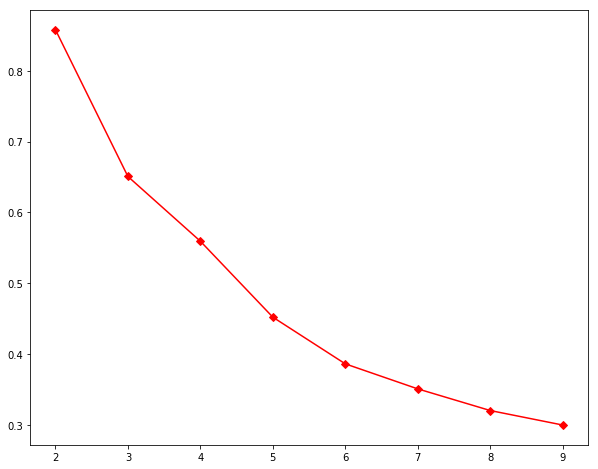

In [15]:
plt.figure(figsize=(10,8))
plt.plot(df12.cluster_number,df12.Error_term, marker = "D",color="red")
plt.show()

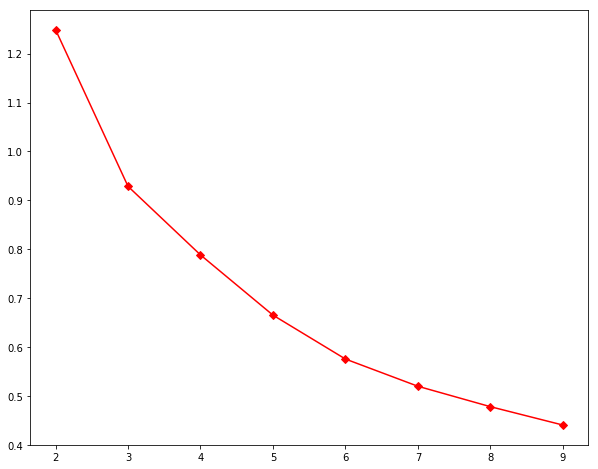

In [16]:
plt.figure(figsize=(10,8))
plt.plot(df13.cluster_number1,df13.Error_term1, marker = "D",color="red")
plt.show()

In [17]:
df_1=df1.copy()

In [18]:
df_1.head()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


In [19]:
# Without scaling the dataset

num_clusters = range(2,10)
error = []
for i in num_clusters:
    cluster = KMeans(i)
    cluster.fit(df_1)
    error.append(cluster.inertia_/100)

df14 = pd.DataFrame({"cluster_number2":num_clusters, "Error_term2":error})
print(df14)

df_1["cluster_label"] = cluster.labels_
df_1.head(10)

   cluster_number2   Error_term2
0                2  1.224828e+10
1                3  8.049802e+09
2                4  5.329696e+09
3                5  4.517109e+09
4                6  3.743987e+09
5                7  3.180812e+09
6                8  2.622914e+09
7                9  2.289620e+09


,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION,cluster_label
0,1,300.000000,1200.00,4,0.00,11,2
1,2,2563.282500,41012.52,16,78737.48,2,0
2,4,3510.000000,7020.00,2,780.00,4,2
3,8,4530.000000,13590.00,3,1510.00,1,2
4,9,2428.076923,33455.00,15,17445.00,6,7
5,10,743.750000,8925.00,12,24075.00,7,2
6,11,1649.357143,14772.00,19,20748.00,1,2
7,12,2257.916667,37265.00,17,15330.00,3,7
8,13,472.500000,1890.00,4,6510.00,1,2
9,14,2800.000000,8400.00,3,1500.00,9,2


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_scld = scaler.fit_transform(df1)
df1_std_scld = pd.DataFrame(std_scld, columns = df1.columns)
df1_std_scld.head()

D:\install\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\install\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,-1.693187,-1.247672,-0.537934,-0.335637,-0.356357,1.676849
1,-1.689803,-0.042388,0.612216,0.263643,0.992207,-0.851028
2,-1.683036,0.461776,-0.369799,-0.435517,-0.342998,-0.289277
3,-1.669502,1.004965,-0.179998,-0.385577,-0.330495,-1.131903
4,-1.666118,-0.114390,0.393885,0.213703,-0.057571,0.272473


In [21]:
df_2=df1.copy()

In [22]:
# With standard scaling the dataset

num_clusters = range(2,10)
error = []
for i in num_clusters:
    cluster = KMeans(i)
    cluster.fit(df1_std_scld)
    error.append(cluster.inertia_/100)

df14 = pd.DataFrame({"cluster_number3":num_clusters, "Error_term3":error})
print(df14)

df_2["cluster_label"] = cluster.labels_
df_2.head(10)

   cluster_number3  Error_term3
0                2    29.380845
1                3    23.727716
2                4    19.497752
3                5    16.557099
4                6    13.863959
5                7    12.531795
6                8    11.663058
7                9    11.131280


,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION,cluster_label
0,1,300.000000,1200.00,4,0.00,11,8
1,2,2563.282500,41012.52,16,78737.48,2,4
2,4,3510.000000,7020.00,2,780.00,4,2
3,8,4530.000000,13590.00,3,1510.00,1,2
4,9,2428.076923,33455.00,15,17445.00,6,8
5,10,743.750000,8925.00,12,24075.00,7,8
6,11,1649.357143,14772.00,19,20748.00,1,4
7,12,2257.916667,37265.00,17,15330.00,3,4
8,13,472.500000,1890.00,4,6510.00,1,4
9,14,2800.000000,8400.00,3,1500.00,9,8
